# flood
an example for the use of porespy.filters.flood

Fills regions of an image with one value based on the original values in the region

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 5
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 425 iterations
Regenerating free_sites after 574 iterations
Regenerating free_sites after 616 iterations
Number of spheres inserted: 616
Final volume fraction: 0.47226666666666667


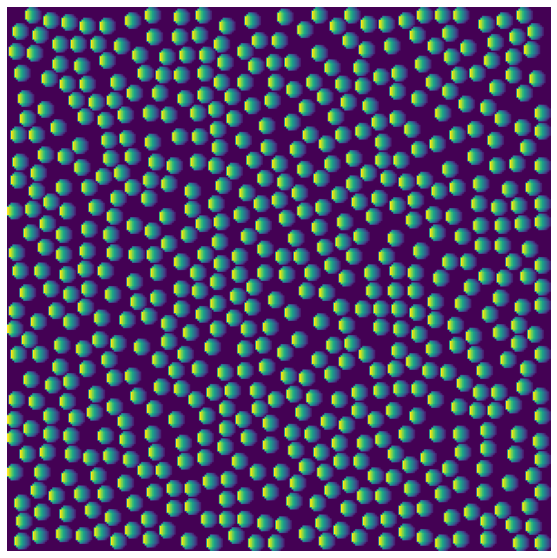

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=5, volume_fraction=0.9)
im = ps.filters.distance_transform_lin(im, axis = 1, mode = "reverse")
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
regions=None
mode="max"

## Apply filter function:
With different parameters

### regions

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  616
Peaks after trimming saddle points:  167
Peaks after trimming nearby peaks:  167


Text(0.5, 1.0, 'regions = snow_partitioning')

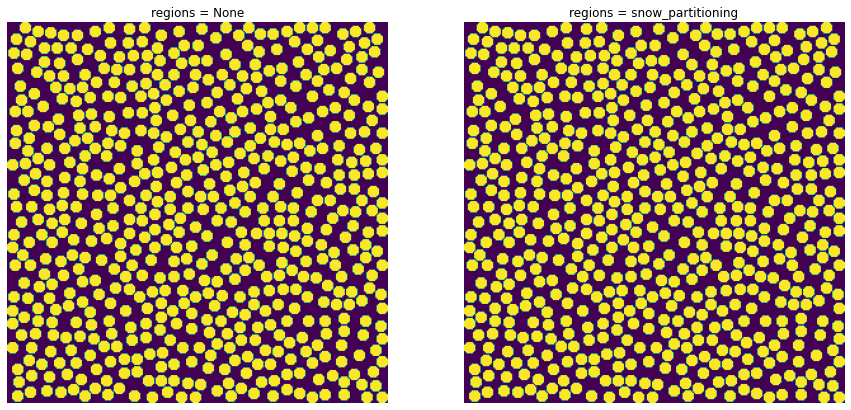

In [3]:
x = ps.filters.flood(im, regions, mode)
r = ps.filters.snow_partitioning(im, dt=None, r_max=4, sigma=0.4, return_all=False,
                      mask=True, randomize=True)
xx = ps.filters.flood(im, r, mode)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('regions = None')
ax[1].set_title('regions = snow_partitioning')

### mode
options are mean, median, max, min, and sum

Text(0.5, 1.0, 'mode = min')

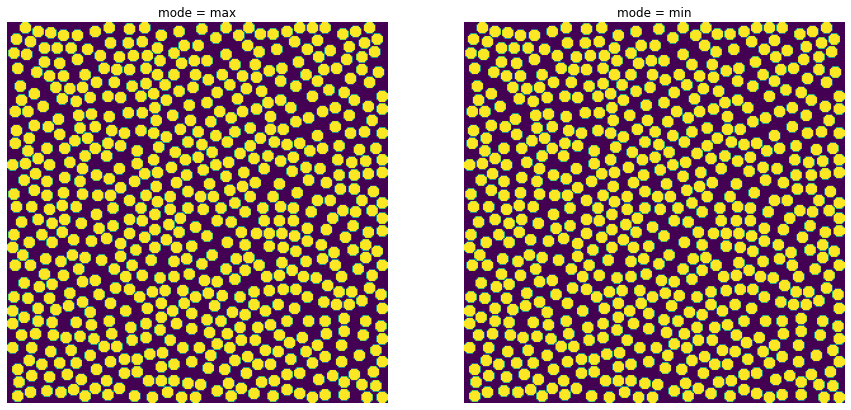

In [4]:
xx = ps.filters.flood(im, regions, 'min')

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('mode = max')
ax[1].set_title('mode = min')